In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
# Figure out how to import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np 

In [2]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2021-06-02 16:28:40--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2021-06-02 16:28:40 (125 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [5]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length= max_sequence_len - 1))
model.add(LSTM(200, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.02)))
model.add(Dense(total_words, activation='sigmoid'))
# Pick an optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 10, 100)           321100    
_________________________________________________________________
lstm_4 (LSTM)                (None, 10, 200)           240800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 200)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                50200     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               6528      
_________________________________________________________________
dense_3 (Dense)              (None, 3211)              414219    
Total params: 1,032,847
Trainable params: 1,032,847
Non-trainable params: 0
____________________________________________

In [6]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 14s 11ms/step - loss: 7.1031 - accuracy: 0.0230
Epoch 2/100
484/484 [==============================] - 5s 11ms/step - loss: 6.6029 - accuracy: 0.0211
Epoch 3/100
484/484 [==============================] - 5s 11ms/step - loss: 6.5624 - accuracy: 0.0212
Epoch 4/100
484/484 [==============================] - 5s 11ms/step - loss: 6.4768 - accuracy: 0.0221
Epoch 5/100
484/484 [==============================] - 5s 11ms/step - loss: 6.4240 - accuracy: 0.0217
Epoch 6/100
484/484 [==============================] - 5s 11ms/step - loss: 6.3672 - accuracy: 0.0221
Epoch 7/100
484/484 [==============================] - 5s 11ms/step - loss: 6.3035 - accuracy: 0.0262
Epoch 8/100
484/484 [==============================] - 5s 11ms/step - loss: 6.2434 - accuracy: 0.0299
Epoch 9/100
484/484 [==============================] - 5s 11ms/step - loss: 6.1891 - accuracy: 0.0316
Epoch 10/100
484/484 [==============================] - 5s 11ms/step - loss: 6.13

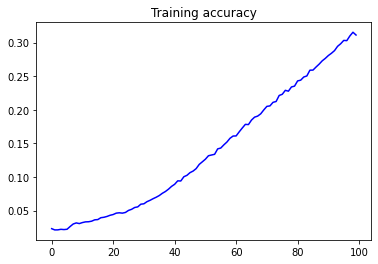

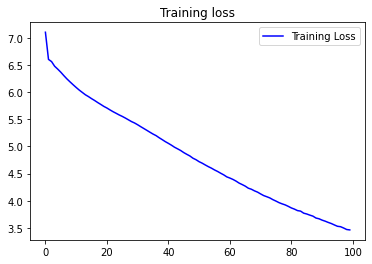

In [7]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [8]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Help me Obi Wan Kenobi, you're my only hope a praise mad youth gone of go dead light near good time very humble hate second face very very very woman woman woman bier very seething world fled hue errors after loss truth good hide hand to wit of thee thee must had than rare survey jewel date ' true true woe part hand men main of love wherein night ' men's kill new back strange night old days quite asleep decease old gone hand hand of hand strange fill to more thee lie of me as thine eyes be love with new part of thee but still did catch
